#### Problem Statement

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#### Attribute Information

|1) id: unique identifier|<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Importing all required modules

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler,LabelEncoder

#### Data Import

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Observations:-<br>
Total Columns in the dataset : 12<br>
Total records in the dataset : 5110<br>
String type Columns : 5 <br>
Integer type Columns : 4 <br>
Decimal type Columns : 3 <br>
Null values present only in bmi column <br>

#### EDA

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


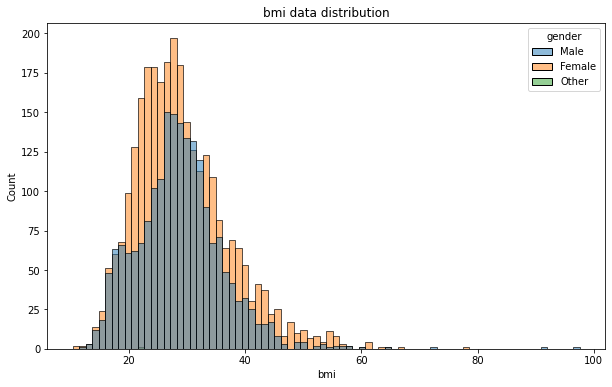

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data=data,x='bmi',hue='gender')
plt.xlabel('bmi')
plt.title('bmi data distribution')
plt.show()

As bmi data ia almost normally distributed, null values can be replaced with mean

In [25]:
data['bmi'].fillna(round(data['bmi'].mean(),1),inplace=True)

In [27]:
#Checking for null values
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Gender column has data with 'Other' value for only one record. So, this one record may not be use full for Machine Learning to train the model. So, this value can be replace with Mode (Female)

In [31]:
data['gender'].loc[3116]='Female'

In [35]:
data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

<AxesSubplot:>

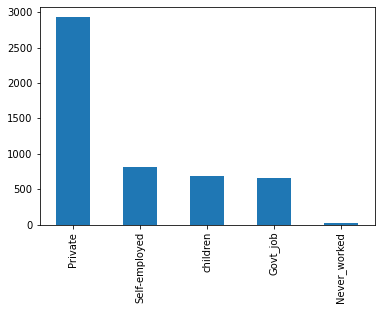

In [45]:
data['work_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

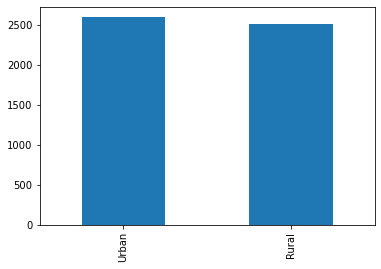

In [44]:
data['Residence_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

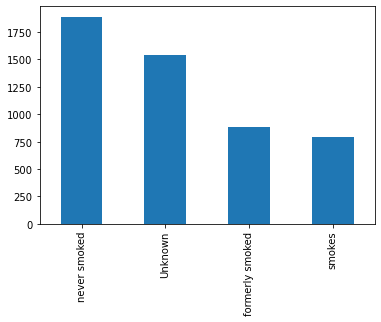

In [43]:
data['smoking_status'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='stroke', ylabel='count'>

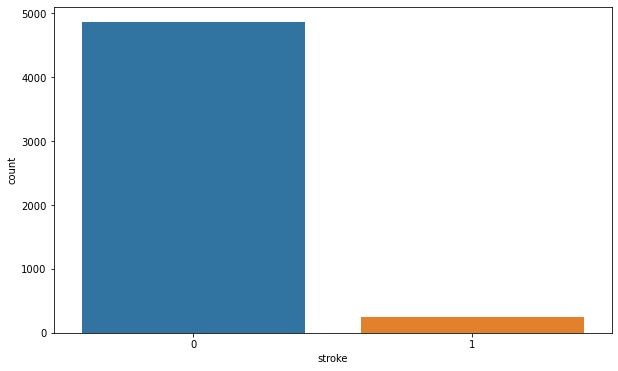

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data['stroke'])
#Looks like this is imbalanced dataset

#### Applying Laber Encoder for the columns gender, Residence_type,smoking_status,work_type and ever_married

In [47]:
le=LabelEncoder()

In [48]:
columns=['gender', 'Residence_type','smoking_status','work_type','ever_married']
data[columns] = data[columns].apply(le.fit_transform)

id column is not having any significance and it is highly co-ordinality column, we can drop it.

In [50]:
data.drop('id',axis=1,inplace=True)

In [51]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.9,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


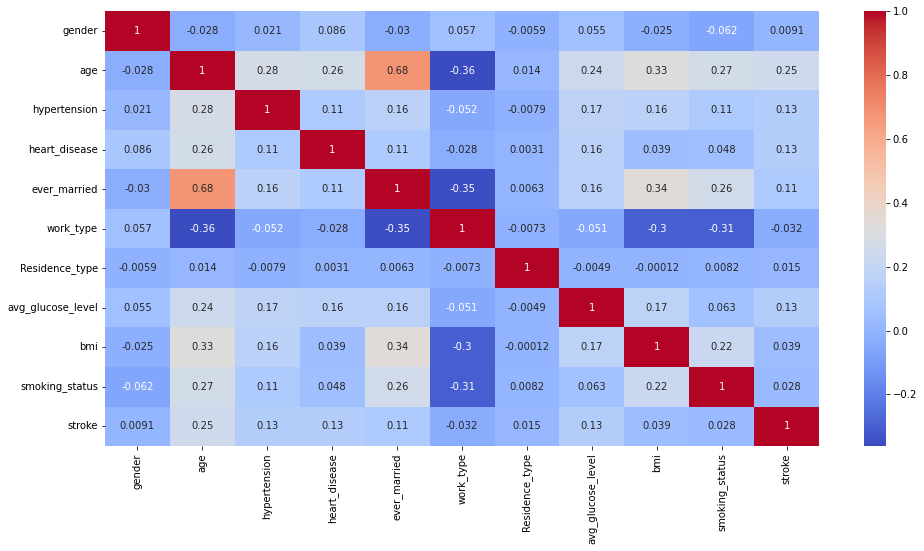

In [58]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),cmap='coolwarm',annot=True)
plt.show()

#### Data ready to Split and build Machine Learning Models

In [59]:
X=data.drop('stroke',axis=1)
y=data['stroke']

In [65]:
scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

In [61]:
models= [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),RandomForestClassifier(), BernoulliNB(), SVC()]

In [67]:
recall = []
precision = []
f1=[]
for model in models:
    cv = cross_val_score(model, X_train, y_train, scoring='recall', cv=10).mean()
    recall.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='precision', cv=10).mean()
    precision.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='f1', cv=10).mean()
    f1.append(cv)
    
modelname = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier','RandomForestClassifier', 
             'BernoulliNB', 'SVC']

score = pd.DataFrame({'Model': modelname, 'Precision': precision, 'Recall': recall, 'F1':f1})
score.style.background_gradient(high=1,axis=0)

,Model,Precision,Recall,F1
0,LogisticRegression,0.000000,0.000000,0.000000
1,KNeighborsClassifier,0.000000,0.000000,0.000000
2,DecisionTreeClassifier,0.139265,0.188562,0.155408
3,RandomForestClassifier,0.150000,0.011438,0.031637
4,BernoulliNB,0.092619,0.028758,0.043573
5,SVC,0.000000,0.000000,0.000000


We can see how poor the model performs without training it with enough samples from both classes.

#### Imbalanced data handling with SMOTE

In [69]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_bal, Y_bal = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_bal, Y_bal, test_size=0.2, random_state=11)

In [70]:
X_train.shape, X_test.shape

((7777, 10), (1945, 10))

In [72]:
all_model = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(),
            RandomForestClassifier(), BernoulliNB(), SVC()]

recall = []
precision = []
f1=[]
balanced_accuracy=[]

for model in all_model:
    cv = cross_val_score(model, X_train, y_train, scoring='recall', cv=10).mean()
    recall.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='precision', cv=10).mean()
    precision.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='f1', cv=10).mean()
    f1.append(cv)
    
    cv = cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=10).mean()
    balanced_accuracy.append(cv)

model = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier',
         'RandomForestClassifier', 'BernoulliNB', 'SVC']

score = pd.DataFrame({'Model': model, 'Precision': precision, 'Recall': recall, 'F1':f1, 'balanced_accuracy':balanced_accuracy})
score.style.background_gradient(high=1,axis=0)

,Model,Precision,Recall,F1,balanced_accuracy
0,LogisticRegression,0.763292,0.820818,0.790942,0.784739
1,KNeighborsClassifier,0.833750,0.987571,0.904138,0.896593
2,DecisionTreeClassifier,0.901686,0.918431,0.910106,0.908891
3,RandomForestClassifier,0.944984,0.962452,0.953808,0.954276
4,BernoulliNB,0.669295,0.880113,0.760186,0.725368
5,SVC,0.796511,0.904459,0.846969,0.838179


Random Forest outperform with clear win! Let's train RF model and evaluate it's performance on test data

In [74]:
rf=RandomForestClassifier(random_state=1)

In [75]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [76]:
pred_rf=rf.predict(X_test)

In [77]:
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))
print("Accuracy Score {}".format(accuracy_score(y_test,pred_rf)))

[[890  56]
 [ 45 954]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       946
           1       0.94      0.95      0.95       999

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945

Accuracy Score 0.9480719794344473


So it's F1-score is 0.95 on test set.